In [1]:
from Bio import pairwise2
import numpy as np

# Function to calculate pairwise alignment scores
def calculate_alignment_score(seq1, seq2):
    alignments = pairwise2.align.globalxx(seq1, seq2)  # Using simple match/mismatch scoring
    if alignments:
        return alignments[0].score
    else:
        return 0  # If no alignment is found, return 0 score

# Example sequences (replace with your sequences)
sequences = [
    "ACGTGACGTTAGC",
    "ACGAGACGTTAGC",
    "ACGAGACGTCAGC",
    # Add more sequences as needed
]

# Calculate similarity scores and construct similarity matrix
num_sequences = len(sequences)
similarity_matrix = np.zeros((num_sequences, num_sequences))

for i in range(num_sequences):
    for j in range(i, num_sequences):  # Only calculate upper triangle of the matrix
        score = calculate_alignment_score(sequences[i], sequences[j])
        similarity_matrix[i, j] = score
        similarity_matrix[j, i] = score  # Similarity matrix is symmetric

# Print similarity matrix
print("Similarity Matrix:")
print(similarity_matrix)


Similarity Matrix:
[[13. 12. 11.]
 [12. 13. 12.]
 [11. 12. 13.]]


c:\Users\KD\miniconda3\envs\genenv\lib\site-packages\Bio\pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [2]:
from sklearn.cluster import KMeans
import numpy as np

# Assuming you have calculated similarity scores and stored them in a matrix
similarity_matrix = similarity_matrix  # Replace ... with your similarity matrix

# Flatten the similarity matrix into a feature matrix
X = similarity_matrix.reshape(-1, 1)

# Define the number of clusters (k)
k = 3

# Apply k-means clustering
kmeans = KMeans(n_clusters=k)
cluster_labels = kmeans.fit_predict(X)

# Print cluster labels
print("Cluster labels:", cluster_labels)


c:\Users\KD\miniconda3\envs\genenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\KD\miniconda3\envs\genenv\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster labels: [1 0 2 0 1 0 2 0 1]


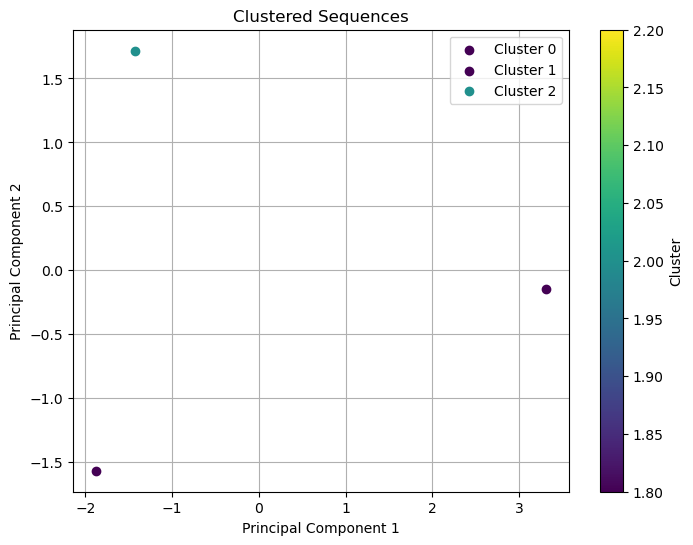

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Define the similarity matrix
# similarity_matrix = np.array([[5, 2, 1],
#                                [2, 6, 3],
#                                [1, 3, 4]])

# Define the similarity matrix
similarity_matrix = np.array(similarity_matrix)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
embedded_data = pca.fit_transform(similarity_matrix)

# Define cluster labels
cluster_labels = [0, 1, 2]

# Scatter plot of embedded data with cluster labels
plt.figure(figsize=(8, 6))
for i in range(len(embedded_data)):
    plt.scatter(embedded_data[i, 0], embedded_data[i, 1], c=cluster_labels[i], cmap='viridis', label=f'Cluster {cluster_labels[i]}')

# Add legend and labels
plt.colorbar(label='Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustered Sequences')

plt.legend()
plt.grid(True)
plt.show()
